In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv(r"C:\Users\AYUSHI\Desktop\Flip Robo\Data Trained Projects\mushrooms.csv")

In [3]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

# Visualization Of Data 

e    4208
p    3916
Name: class, dtype: int64


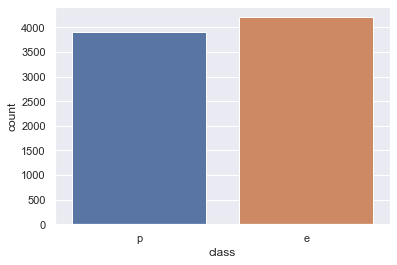

In [7]:
ax=sns.countplot(x="class",data=df)
print(df["class"].value_counts())

In [8]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64


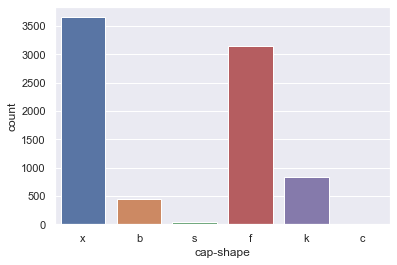

In [9]:
ax=sns.countplot(x=('cap-shape'),data=df)
print(df['cap-shape'].value_counts())

y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64


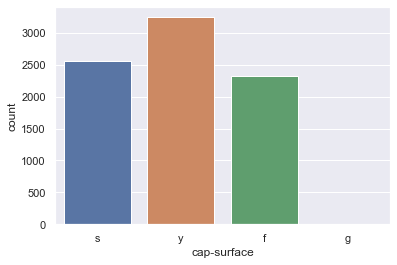

In [10]:
ax=sns.countplot(x=('cap-surface'),data=df)
print(df['cap-surface'].value_counts())

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64


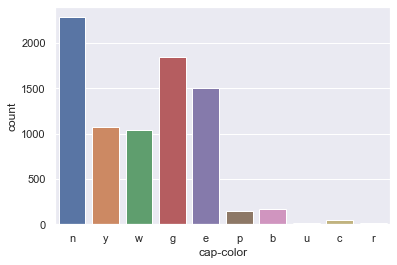

In [11]:
ax=sns.countplot(x=('cap-color'),data=df)
print(df['cap-color'].value_counts())

b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64


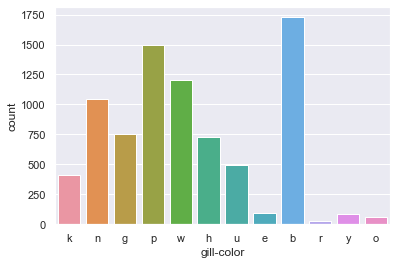

In [12]:
ax=sns.countplot(x=('gill-color'),data=df)
print(df['gill-color'].value_counts())

w    7924
n      96
o      96
y       8
Name: veil-color, dtype: int64


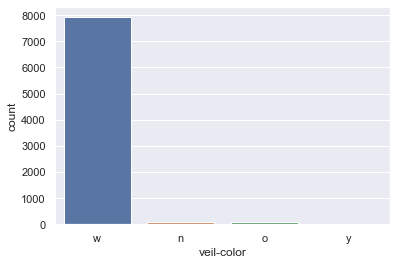

In [13]:
ax=sns.countplot(x=('veil-color'),data=df)
print(df['veil-color'].value_counts())

v    4040
y    1712
s    1248
n     400
a     384
c     340
Name: population, dtype: int64


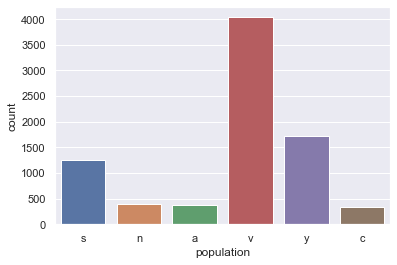

In [14]:
ax=sns.countplot(x=('population'),data=df)
print(df['population'].value_counts())

In [15]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [16]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [17]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.0,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,4.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
1,0.0,5.0,2.0,9.0,1.0,0.0,1.0,0.0,0.0,4.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,1.0
2,0.0,0.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,3.0
3,1.0,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,5.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
4,0.0,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,4.0,...,2.0,7.0,7.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.0,3.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,...,2.0,5.0,5.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0
8120,0.0,5.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,...,2.0,5.0,5.0,0.0,0.0,1.0,4.0,0.0,4.0,2.0
8121,0.0,2.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,5.0,...,2.0,5.0,5.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0
8122,1.0,3.0,3.0,4.0,0.0,8.0,1.0,0.0,1.0,0.0,...,1.0,7.0,7.0,0.0,2.0,1.0,0.0,7.0,4.0,2.0


In [18]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [19]:
x=df.drop("class",axis=1)
y=df["class"]

In [20]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,4.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
1,5.0,2.0,9.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,1.0
2,0.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,3.0
3,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,5.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
4,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,4.0,1.0,...,2.0,7.0,7.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,0.0,...,2.0,5.0,5.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0
8120,5.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,0.0,...,2.0,5.0,5.0,0.0,0.0,1.0,4.0,0.0,4.0,2.0
8121,2.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,...,2.0,5.0,5.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0
8122,3.0,3.0,4.0,0.0,8.0,1.0,0.0,1.0,0.0,1.0,...,1.0,7.0,7.0,0.0,2.0,1.0,0.0,7.0,4.0,2.0


In [22]:
y

0       1.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
8119    0.0
8120    0.0
8121    0.0
8122    1.0
8123    0.0
Name: class, Length: 8124, dtype: float64

In [23]:
maxAcc=0
maxRS=0

for i in range(1,1500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best accuracy is",maxAcc,"on Random state",maxRS)

Best accuracy is 0.9673846153846154 on Random state 1402


In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1402)

In [25]:
x_train

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
6278,5.0,2.0,2.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,...,1.0,6.0,7.0,0.0,2.0,1.0,0.0,7.0,4.0,4.0
7886,2.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,6.0,0.0,...,2.0,5.0,5.0,0.0,1.0,1.0,4.0,0.0,4.0,2.0
3892,5.0,0.0,3.0,0.0,2.0,1.0,0.0,0.0,2.0,0.0,...,1.0,4.0,0.0,0.0,2.0,1.0,2.0,1.0,4.0,1.0
4800,5.0,2.0,3.0,1.0,2.0,1.0,0.0,0.0,3.0,1.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,1.0,3.0,1.0
6663,0.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,6.0,0.0,...,2.0,5.0,5.0,0.0,0.0,1.0,4.0,8.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,5.0,2.0,4.0,0.0,5.0,1.0,1.0,0.0,7.0,1.0,...,0.0,7.0,7.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0
9,0.0,2.0,9.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,3.0
951,0.0,2.0,9.0,1.0,3.0,1.0,0.0,0.0,5.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,1.0
3631,5.0,0.0,2.0,1.0,5.0,1.0,0.0,0.0,10.0,1.0,...,2.0,3.0,3.0,0.0,2.0,1.0,4.0,2.0,5.0,0.0


In [26]:
y_train

6278    1.0
7886    0.0
3892    1.0
4800    1.0
6663    0.0
       ... 
1210    0.0
9       0.0
951     0.0
3631    0.0
6201    1.0
Name: class, Length: 6499, dtype: float64

In [27]:
x_test

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7570,3.0,2.0,4.0,0.0,5.0,1.0,0.0,0.0,10.0,0.0,...,3.0,4.0,4.0,0.0,2.0,2.0,4.0,7.0,5.0,4.0
2938,5.0,0.0,4.0,1.0,5.0,1.0,0.0,0.0,9.0,1.0,...,2.0,6.0,7.0,0.0,2.0,1.0,4.0,3.0,5.0,0.0
3873,5.0,0.0,3.0,0.0,2.0,1.0,0.0,0.0,3.0,0.0,...,1.0,4.0,6.0,0.0,2.0,1.0,2.0,1.0,4.0,0.0
686,2.0,0.0,3.0,0.0,5.0,1.0,0.0,1.0,4.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,4.0,5.0
5145,5.0,3.0,4.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,...,1.0,6.0,6.0,0.0,2.0,1.0,0.0,7.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2982,5.0,0.0,2.0,1.0,5.0,1.0,0.0,0.0,9.0,1.0,...,2.0,3.0,7.0,0.0,2.0,1.0,4.0,3.0,4.0,0.0
4278,5.0,3.0,9.0,0.0,2.0,1.0,0.0,0.0,3.0,0.0,...,1.0,4.0,6.0,0.0,2.0,1.0,2.0,1.0,5.0,1.0
636,2.0,3.0,9.0,1.0,0.0,1.0,0.0,0.0,7.0,0.0,...,3.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,1.0
2703,2.0,0.0,4.0,1.0,5.0,1.0,0.0,0.0,10.0,1.0,...,2.0,7.0,3.0,0.0,2.0,1.0,4.0,3.0,5.0,0.0


In [28]:
y_test

7570    0.0
2938    0.0
3873    1.0
686     0.0
5145    1.0
       ... 
2982    0.0
4278    1.0
636     0.0
2703    0.0
6881    1.0
Name: class, Length: 1625, dtype: float64

In [29]:
x_train.shape

(6499, 22)

In [30]:
y_train.shape

(6499,)

In [31]:
x_test.shape

(1625, 22)

In [32]:
y_test.shape

(1625,)

## Logistic Regression

In [34]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print ("Accuracy",accuracy_score(y_test, predlr)*100)
print (confusion_matrix(y_test,predlr))
print (classification_report(y_test,predlr))

Accuracy 96.73846153846154
[[827  30]
 [ 23 745]]
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       857
         1.0       0.96      0.97      0.97       768

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625



## Decision Tree classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier 
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
preddt=DT.predict(x_test)
print ("Accuracy",accuracy_score(y_test, preddt)*100)
print (confusion_matrix(y_test,preddt))
print (classification_report(y_test,preddt))

Accuracy 100.0
[[857   0]
 [  0 768]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       857
         1.0       1.00      1.00      1.00       768

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



## Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier 
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
predrf=RF.predict(x_test)
print ("Accuracy",accuracy_score(y_test, predrf)*100)
print (confusion_matrix(y_test,predrf))
print (classification_report(y_test,predrf))

Accuracy 100.0
[[857   0]
 [  0 768]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       857
         1.0       1.00      1.00      1.00       768

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



## Support Vector Classifier

In [37]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsv=svc.predict(x_test)
print ("Accuracy",accuracy_score(y_test, predsv)*100)
print (confusion_matrix(y_test,predsv))
print (classification_report(y_test,predsv))

Accuracy 99.50769230769231
[[856   1]
 [  7 761]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       857
         1.0       1.00      0.99      0.99       768

    accuracy                           1.00      1625
   macro avg       1.00      0.99      1.00      1625
weighted avg       1.00      1.00      1.00      1625



## Comparison of Classifiers

In [42]:
Names=["Logistic Regression","Decision Tree Classifier","Random Forest Classifier","Support Vector Classifier"]
Accuracy=["96.73","100","100","99.50"]
result=pd.DataFrame()
result['Classification Model']= Names
result['Accuracy ']= Accuracy
result

,Classification Model,Accuracy
0,Logistic Regression,96.73
1,Decision Tree Classifier,100
2,Random Forest Classifier,100
3,Support Vector Classifier,99.50
